<a href="https://colab.research.google.com/github/luisguillermomuller/Segunda-Entrega/blob/main/Data_StoryTelling%2BCamachoMuller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Air carrier statistics**
Archivo de datos sometidos por las compañías aéreas principales sobre los vuelos que realizaron, ya sea saliendo de o llegando a los aeropuertos de Puerto Rico. La información es recopilada mensualmente por el Bureau of Transportation Statistics desde 1990 e incluye los aeropuertos de origen y de destino, tipo de avión, número de pasajeros transportados y de asientos disponibles, peso del correo y de la carga trasportada, distancia recorrida, duración de vuelos, mes de los vuelos, entre otros. Los datos se refieren a segmentos de vuelos (es decir el movimiento entre dos aeropuertos mediante vuelos sin paradas), no a mercados de vuelos (es decir el movimiento entre dos aeropuertos mediante vuelos o combinaciones de vuelos que pueden hacer paradas). Se ofrecen dos archivos de datos: 1) Vuelos domésticos (solo incluye compañías aéreas de los Estados Unidos y solo incluye vuelos entre dos aeropuertos dentro de los Estados Unidos, pero contiene datos más actualizados) 

OBJETIVO: 

1) Data Exploration

2) Data Cleaning

3) Data Visualisation

4) Data Preprocessing

5) Machine Learning Model (Estimar PAYLOAD futuros)



In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np                    # Importar Numpy
import pandas as pd                   # Importar Pandas
import scipy as sp
pd.set_option('max_columns', None)    # Configuracion pandas
from prettytable import PrettyTable

# Gráficos
# ==============================================================================
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt       # El modulo Pyplot de Matplotlib
import seaborn as sns                 # Importar Seaborn
import plotly.express as px

mpl.style.use('bmh')    # Establecemos un nuevo estilo

#import probscale
#import matplotlib.font_manager
#from matplotlib import style

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import scale
from sklearn import preprocessing  # Import label encoder
from sklearn.model_selection import train_test_split #para separar en train y test
# Modelos de Clasificacion:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# REGRESIÓN LOGISTICA
from sklearn.linear_model import LogisticRegression
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# ARBOL DEL DECISION
from sklearn.tree import DecisionTreeClassifier 
# XGBOOST
import xgboost 

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Métricas
# ==============================================================================
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Trabajo Final 1/VuelosDomesticos.csv")
df.head(5)


,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS
0,7,7,250600.0,1050,735,1219,355,1547,1549,1380,AA,19805.0,American Airlines Inc.,0A050,D,AA,American Airlines Inc.,3,3.0,14843,1484302,34819,SJU,"San Juan, PR",PR,72,Puerto Rico,3,10397,1039702,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,7,715,1,1990,1,1,4,F
1,41,40,1454376.0,5988,5442,519,3991,1547,9025,8031,EA,19707.0,Eastern Air Lines Inc.,0A285,D,EA,Eastern Air Lines Inc.,3,3.0,14843,1484302,34819,SJU,"San Juan, PR",PR,72,Puerto Rico,3,10397,1039702,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,7,715,1,1990,1,1,4,F
2,30,29,2211975.0,9164,6302,37121,18333,1547,6465,5726,EA,19707.0,Eastern Air Lines Inc.,0A285,D,EA,Eastern Air Lines Inc.,3,3.0,14843,1484302,34819,SJU,"San Juan, PR",PR,72,Puerto Rico,3,10397,1039702,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,7,760,1,1990,1,1,4,F
3,1,1,75717.0,257,152,4600,325,1547,231,199,EA,19707.0,Eastern Air Lines Inc.,0A285,D,EA,Eastern Air Lines Inc.,3,3.0,14843,1484302,34819,SJU,"San Juan, PR",PR,72,Puerto Rico,3,10397,1039702,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,6,690,1,1990,1,1,4,F
4,24,24,1155180.0,4488,3396,19777,4320,1547,5304,4910,DL,19790.0,Delta Air Lines Inc.,01260,D,DL,Delta Air Lines Inc.,3,3.0,14843,1484302,34819,SJU,"San Juan, PR",PR,72,Puerto Rico,3,10397,1039702,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,6,622,1,1990,1,1,4,F


In [ ]:
# Genero una función que realiza una tabla resumen de los campos del dataframe

def df_explore(df):
    #Description table of the main characteristics of each column from a dataset
    print( 'Shape: ', df.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])
    
    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

df_explore(df)

Shape:  (85736, 45)
+-----------------------+---------+----------+-------+--------+------------------------+
|         Column        |   Type  | Non-Null | Nulls | Unique |        Example         |
+-----------------------+---------+----------+-------+--------+------------------------+
|  DEPARTURES_SCHEDULED |  int64  |  85736   |   0   |  537   |           7            |
|  DEPARTURES_PERFORMED |  int64  |  85736   |   0   |  484   |           7            |
|        PAYLOAD        | float64 |  85736   |   0   | 28797  |        250600.0        |
|         SEATS         |  int64  |  85736   |   0   | 10075  |          1050          |
|       PASSENGERS      |  int64  |  85736   |   0   | 13927  |          735           |
|        FREIGHT        |  int64  |  85736   |   0   | 34575  |          1219          |
|          MAIL         |  int64  |  85736   |   0   | 17980  |          355           |
|        DISTANCE       |  int64  |  85736   |   0   |  419   |          1547          |
|

**OBSERVACIONES:** 

1 - En la variable **UNIQUE_CARRIER** se encuentran 343 nulos, pero afortunadamente es la abreviatura de **UNIQUE_CARRIER_NAME** que solo tiene 7 nulos, por lo que podemos completar los nulos con datos reales, como son abreviaturas, las elimino dejando la nomenclaruta completa. 

2- En la variable **CARRIER** se encuentran 1835 nulos, similar al punto anterior podemos completar los datos faltantes con **CARRIER_NAME**, mismo criterio que el anterior.

3- Siendo tan baja la cantidad de nulos y que responder a una variable de objeto, la cual no puedo estimarla matematicamente, procedo a descartarlas.

**OBSERVACIONES**
 


In [ ]:
df=df.drop(columns=['MAIL','UNIQUE_CARRIER','UNIQUE_CARRIER_ENTITY','CARRIER','ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','ORIGIN_CITY_MARKET_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','DEST_CITY_MARKET_ID'])


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df_explore(df)

Shape:  (85729, 35)
+----------------------+---------+----------+-------+--------+------------------------+
|        Column        |   Type  | Non-Null | Nulls | Unique |        Example         |
+----------------------+---------+----------+-------+--------+------------------------+
| DEPARTURES_SCHEDULED |  int64  |  85729   |   0   |  537   |           7            |
| DEPARTURES_PERFORMED |  int64  |  85729   |   0   |  484   |           7            |
|       PAYLOAD        | float64 |  85729   |   0   | 28797  |        250600.0        |
|        SEATS         |  int64  |  85729   |   0   | 10075  |          1050          |
|      PASSENGERS      |  int64  |  85729   |   0   | 13927  |          735           |
|       FREIGHT        |  int64  |  85729   |   0   | 34572  |          1219          |
|       DISTANCE       |  int64  |  85729   |   0   |  419   |          1547          |
|     RAMP_TO_RAMP     |  int64  |  85729   |   0   | 17771  |          1549          |
|       AIR_

In [ ]:
df.duplicated().any()

False

**OBSERVACIONES:**

No hay lineas duplicadas

In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
DEPARTURES_SCHEDULED,85729.0,36.17,58.90,0.0,2.0,21.0,39.0,3335.0
DEPARTURES_PERFORMED,85729.0,34.74,51.32,0.0,3.0,21.0,38.0,986.0
PAYLOAD,85729.0,1245362.76,1782965.69,0.0,112000.0,604800.0,1586000.0,25006800.0
SEATS,85729.0,3891.40,5953.78,0.0,172.0,1332.0,5280.0,63813.0
PASSENGERS,85729.0,2953.12,4647.72,0.0,101.0,908.0,4118.0,55741.0
FREIGHT,85729.0,138525.33,491944.57,0.0,0.0,1020.0,29382.0,12748312.0
DISTANCE,85729.0,1225.96,669.45,0.0,1045.0,1475.0,1608.0,9723.0
RAMP_TO_RAMP,85729.0,4881.58,6233.48,0.0,505.0,2686.0,6849.0,96220.0
AIR_TIME,85729.0,4249.02,5493.65,0.0,427.0,2251.0,6063.0,71632.0
AIRLINE_ID,85729.0,20141.48,404.85,19386.0,19805.0,20151.0,20409.0,22085.0


In [ ]:
df['CLASS'].value_counts()

F    65665
G    10107
L     5400
P     4557
Name: CLASS, dtype: int64

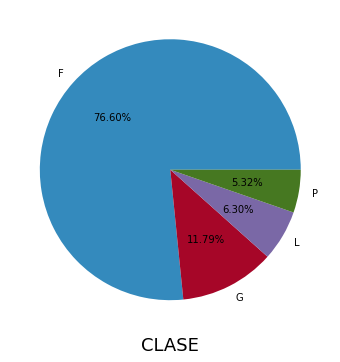

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df["CLASS"].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.xlabel("CLASE", fontsize=18)
plt.ylabel("", fontsize=18)
plt.show()

**OBSERVACIONES**
Podemos Observar que la mayor cantidad de ventas se encuentan en la CLASE F   (Primera Clase sin restricciones) con un **76.60%**

**F** = Tarifa de primera clase sin restricciones

**G**= Tarifa económica para viajes organizados y paquetes vacacionales.

**L**= Clase económica con muchas restricciones.

**P**= Primera clase con restricciones.


Text(0, 0.5, 'PAYLOAD')

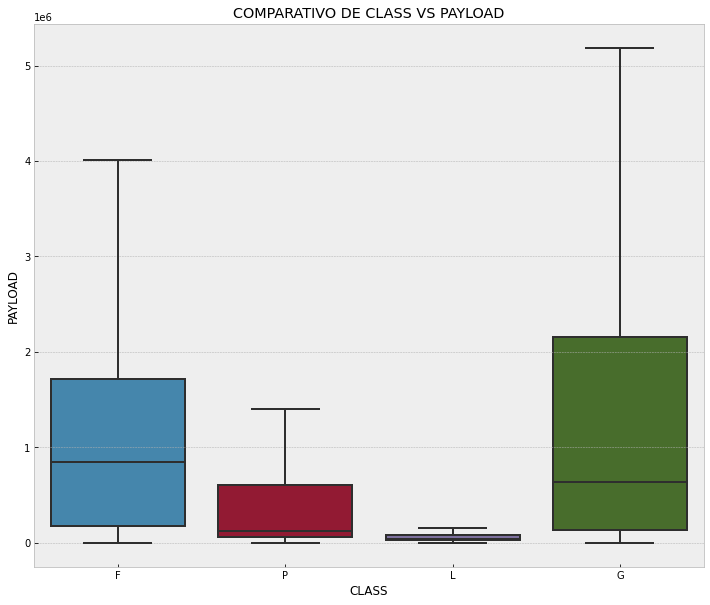

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df.CLASS, y= df.PAYLOAD, showfliers=False)
plt.title('COMPARATIVO DE CLASS VS PAYLOAD')
plt.xlabel('CLASS')
plt.ylabel('PAYLOAD')

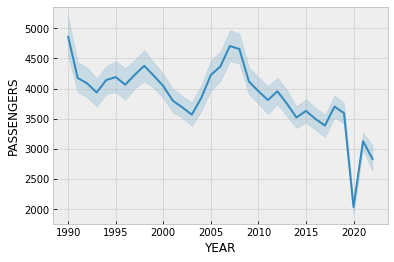

In [ ]:
df_flights = df.query("CLASS == 'F'")
sns.lineplot(data=df_flights, x="YEAR", y="PASSENGERS")

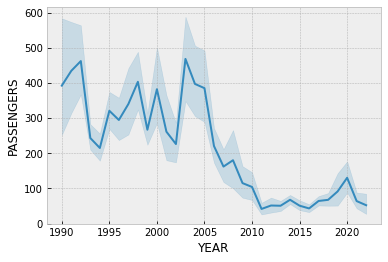

In [ ]:
df_flights = df.query("CLASS == 'L'")
sns.lineplot(data=df_flights, x="YEAR", y="PASSENGERS")

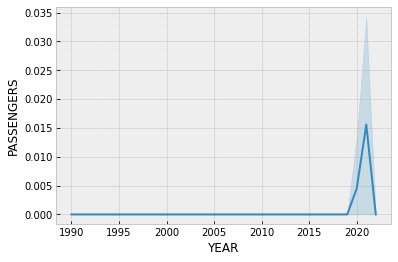

In [ ]:
df_flights = df.query("CLASS == 'P'")
sns.lineplot(data=df_flights, x="YEAR", y="PASSENGERS")

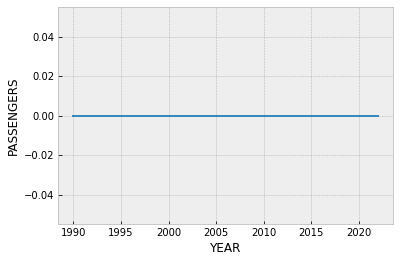

In [ ]:
df_flights = df.query("CLASS == 'G'")
sns.lineplot(data=df_flights, x="YEAR", y="PASSENGERS")

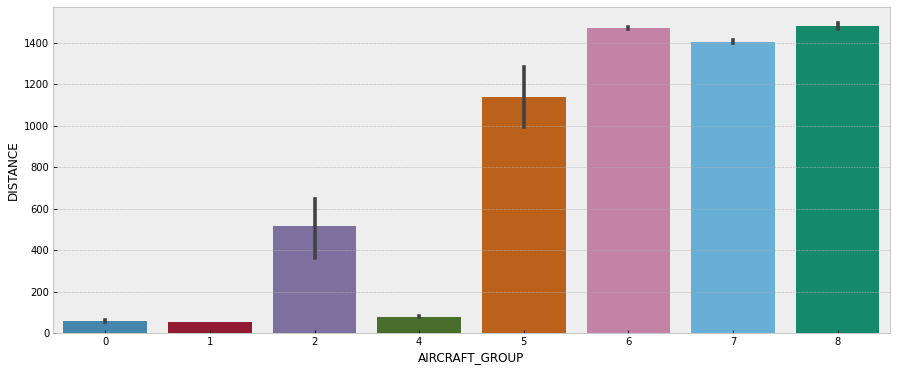

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='DISTANCE',x='AIRCRAFT_GROUP',data=df)

**OBSERVACIONES**

Observamos que los viajes de mayor distancia se encuentran en el grupo de aeronave 5,6,7,8.

In [ ]:
df['AIRCRAFT_GROUP'].value_counts()



6    54335
7    14157
1     7787
4     6492
8     2814
5       84
2       44
0       16
Name: AIRCRAFT_GROUP, dtype: int64

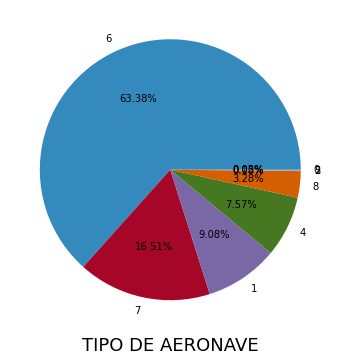

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df["AIRCRAFT_GROUP"].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.xlabel("TIPO DE AERONAVE", fontsize=18)
plt.ylabel("", fontsize=18)
plt.show()

**OBSERVACIONES**

El tipo de Aeronave N°6 es quien mas desarrolla los vuelos teniendo unos **54335** de vuelos de la muestra. Representando el **63.38%**. 

In [ ]:
df['ORIGIN_STATE_NM'].value_counts()

Puerto Rico            47856
Florida                10607
U.S. Virgin Islands     4953
New York                3552
New Jersey              2632
Pennsylvania            2206
Georgia                 1723
North Carolina          1642
Texas                   1566
Illinois                1474
Tennessee               1247
Virginia                 973
Kentucky                 972
Massachusetts            943
Maryland                 748
Connecticut              581
Ohio                     469
Michigan                 406
Minnesota                295
Missouri                 286
Indiana                  178
California               149
South Carolina            78
Louisiana                 71
Wisconsin                 20
Mississippi               17
Oklahoma                  16
Alabama                   10
Rhode Island              10
Nevada                     6
Maine                      6
Delaware                   5
Alaska                     4
Washington                 4
Iowa          

In [ ]:
df['DEST_STATE_NM'].value_counts()

Puerto Rico            45726
Florida                11293
U.S. Virgin Islands     4613
New York                3676
New Jersey              2813
Pennsylvania            2385
Georgia                 1867
North Carolina          1698
Texas                   1664
Illinois                1582
Tennessee               1342
Virginia                1176
Kentucky                1055
Massachusetts            990
Maryland                 794
Connecticut              593
Ohio                     489
Michigan                 459
Minnesota                329
Missouri                 311
Indiana                  273
South Carolina           156
California               152
Louisiana                 96
Alabama                   40
Wisconsin                 26
Rhode Island              24
Oklahoma                  22
Arkansas                  16
Arizona                   12
Iowa                       8
Maine                      8
Mississippi                7
Delaware                   7
New Hampshire 

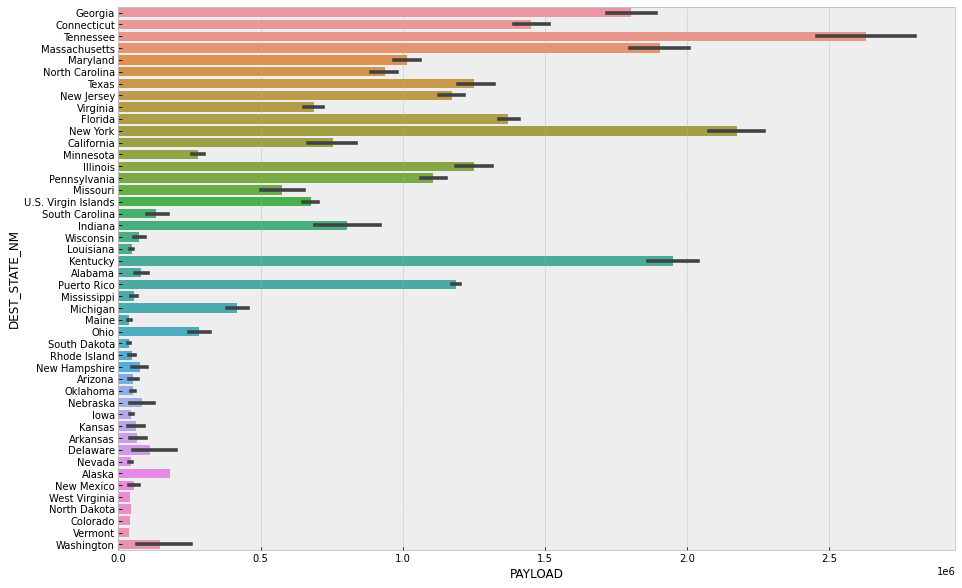

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(y='DEST_STATE_NM', x='PAYLOAD',data=df)

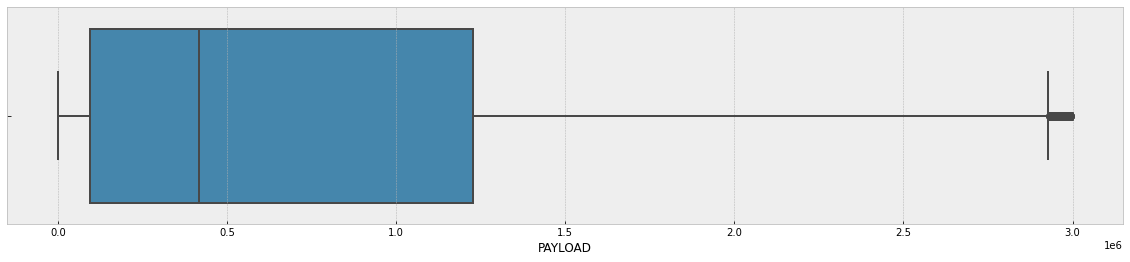

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(x=df['PAYLOAD'])

In [ ]:
df = df.drop(df.index[df['PAYLOAD'] >= 3000000])

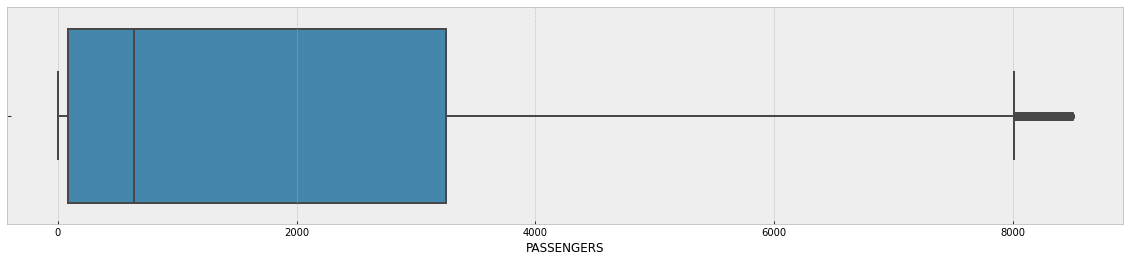

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(x=df['PASSENGERS'])

In [ ]:
df = df.drop(df.index[df['PASSENGERS'] >= 8500])

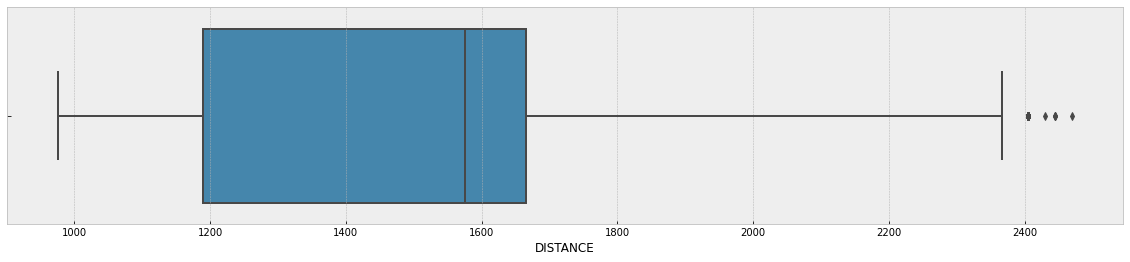

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(x=df['DISTANCE'])

In [ ]:
df = df.drop(df.index[df['DISTANCE'] >= 2800])

In [ ]:
df = df.drop(df.index[df['DISTANCE'] <= 500])

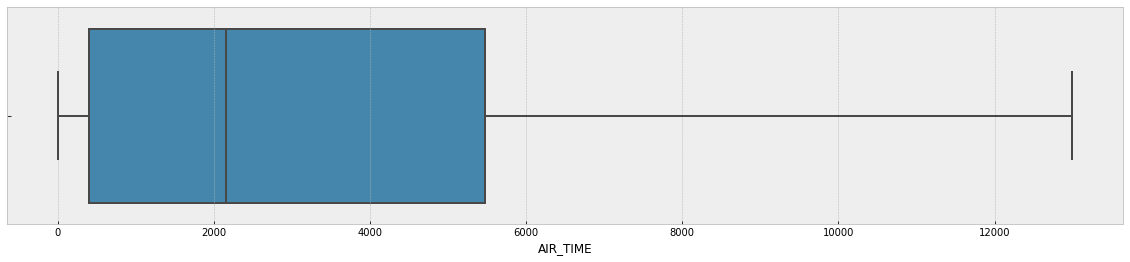

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(x=df['AIR_TIME'])

In [ ]:
df = df.drop(df.index[df['AIR_TIME'] >= 14000])

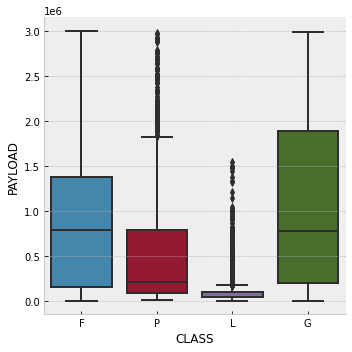

In [ ]:
sns.catplot(x = "CLASS", y = "PAYLOAD", data = df, kind = "box")

Text(0.5, 0.98, 'Features distribution')

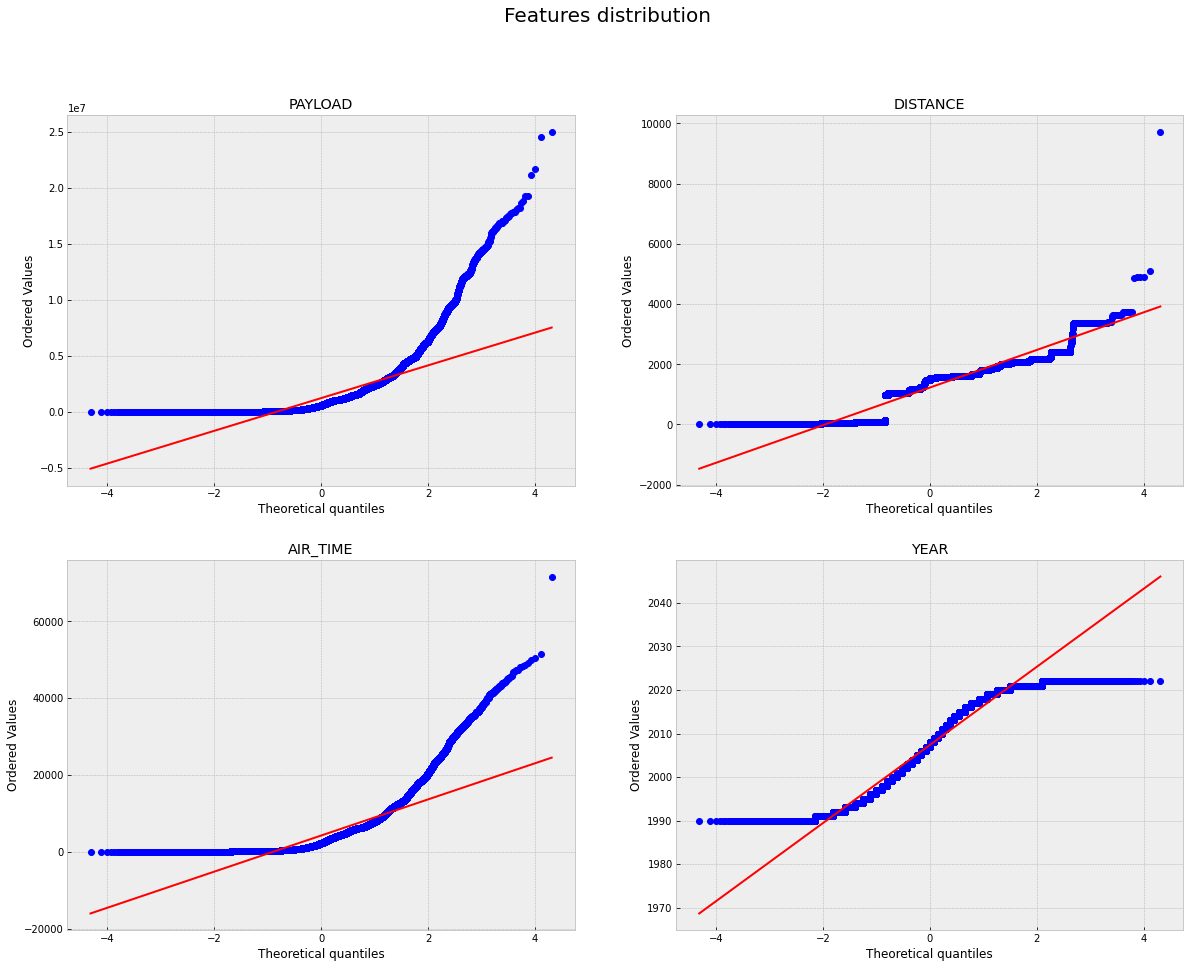

In [ ]:
fig = plt.figure(figsize = (20,15))
plt.subplot(221)
stats.probplot(df['PAYLOAD'], dist = 'norm', plot = plt)
plt.title('PAYLOAD')
plt.subplot(222)
stats.probplot(df['DISTANCE'], dist = 'norm', plot = plt)
plt.title('DISTANCE')
plt.subplot(223)
stats.probplot(df['AIR_TIME'], dist = 'norm', plot = plt)
plt.title('AIR_TIME')
plt.subplot(224)
stats.probplot(df['YEAR'], dist = 'norm', plot = plt)
plt.title('YEAR')
fig.suptitle('Features distribution', fontsize = 20)

<Figure size 5760x5760 with 0 Axes>

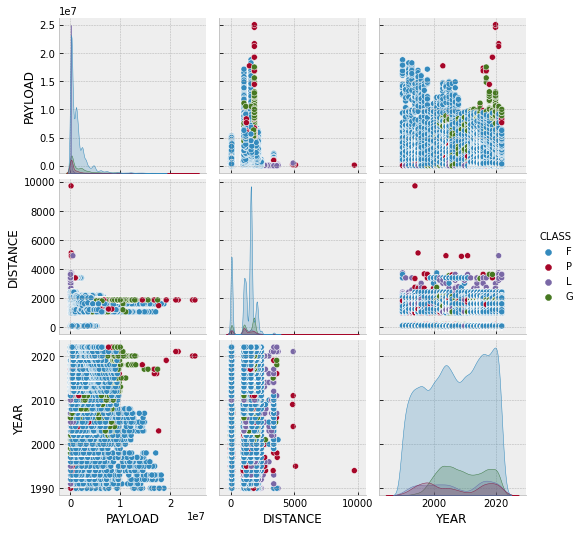

In [ ]:
Num_variables = ['PAYLOAD','DISTANCE','YEAR','CLASS']

plt.figure(figsize=(80,80))

sns.pairplot(df[Num_variables] ,hue ='CLASS', hue_order =['F','P','L','G'])

plt.show()

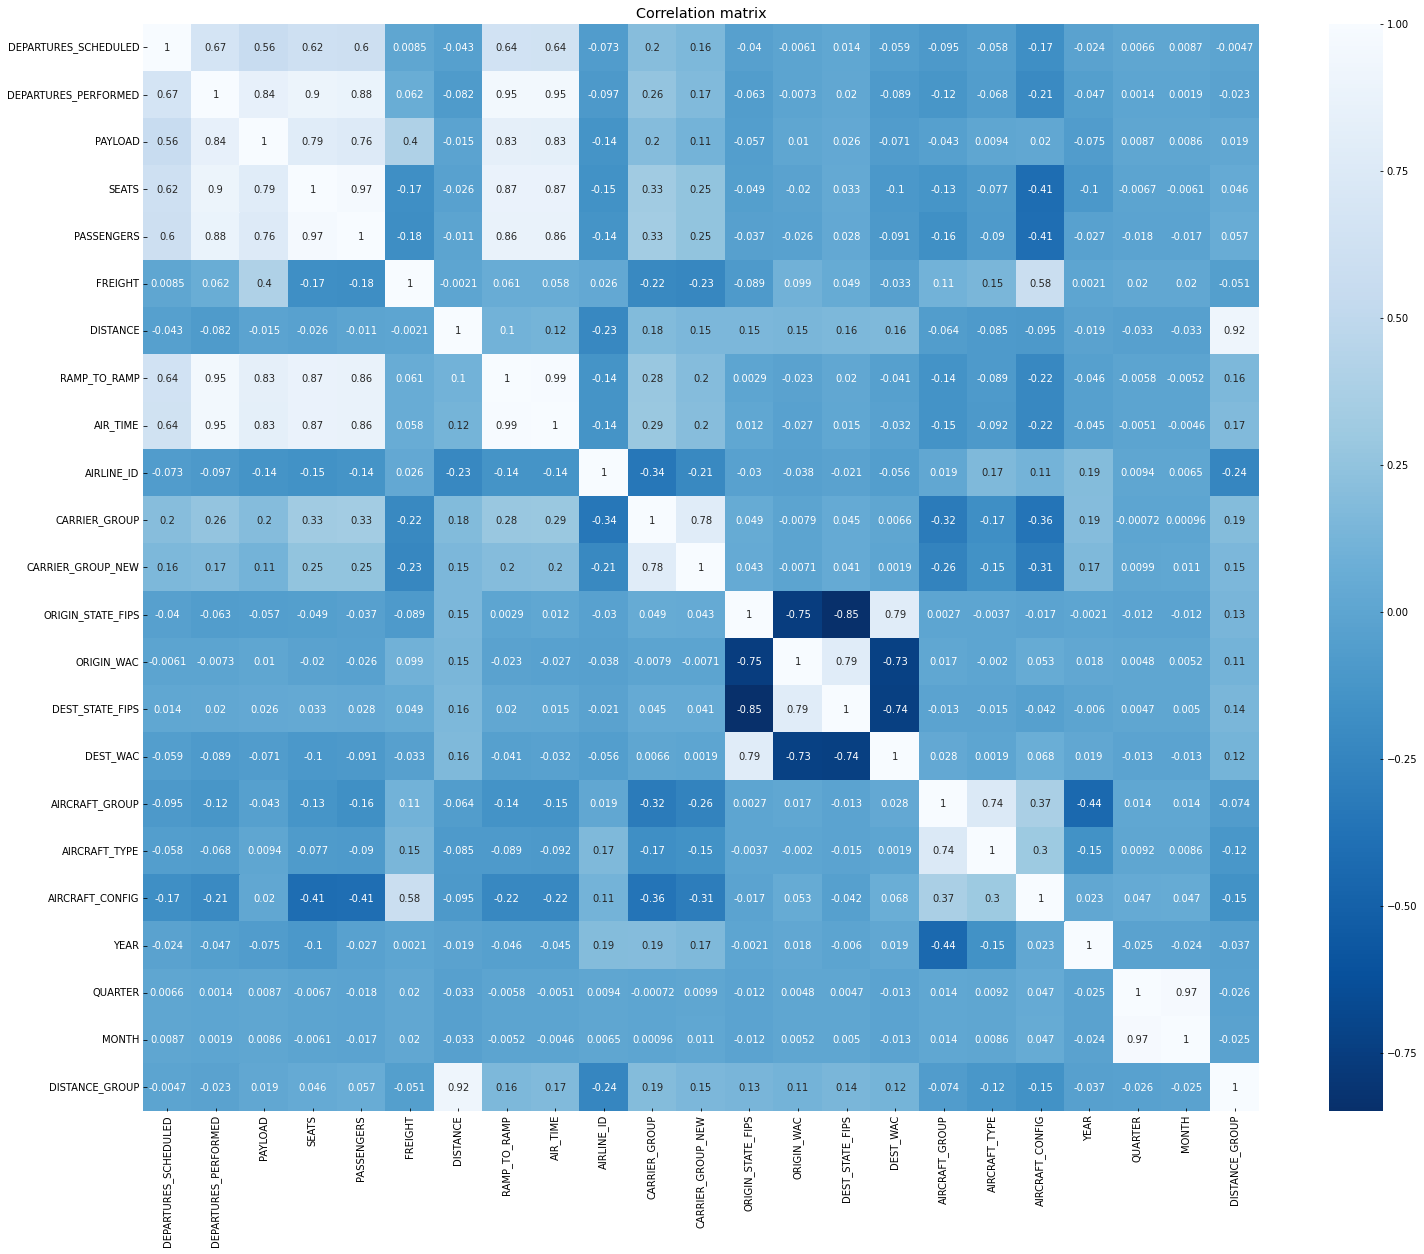

In [ ]:
plt.figure(figsize=(25,20))
plt.title('Correlation matrix')
sns.heatmap(df.corr(), cmap = "Blues_r", annot = True)

**METRICAS ALGORITMOS DE REGRESION**

In [ ]:
le = preprocessing.LabelEncoder()


In [ ]:
df['ORIGIN_STATE_NM'] = le.fit_transform(df['ORIGIN_STATE_NM'])

In [ ]:
df['DEST_STATE_NM'] = le.fit_transform(df['DEST_STATE_NM'])

In [ ]:
df['MONTH'] = le.fit_transform(df['MONTH'])

In [ ]:
df['YEAR'] = le.fit_transform(df['YEAR'])

In [ ]:
df['SEATS'] = le.fit_transform(df['SEATS'])

In [ ]:
Clase = pd.get_dummies(df['DEPARTURES_PERFORMED'])
df = pd.concat([df, Clase], axis = 1)

In [ ]:
#'MONTH','YEAR','AIR_TIME','DEPARTURES_SCHEDULED','DEPARTURES_PERFORMED','SEATS','FREIGHT','DISTANCE','RAMP_TO_RAMP','AIRLINE_ID','DISTANCE_GROUP','PASSENGERS',,'ORIGIN_STATE_NM','DEST_STATE_NM',
X = df.drop(['UNIQUE_CARRIER_NAME','REGION','CARRIER_NAME','CARRIER_GROUP','CARRIER_GROUP_NEW','PAYLOAD','ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','ORIGIN_STATE_FIPS','ORIGIN_WAC','DEST','DEST_CITY_NAME','DEST_STATE_ABR','DEST_STATE_FIPS','DEST_WAC','AIRCRAFT_GROUP', 
'AIRCRAFT_TYPE','AIRCRAFT_CONFIG','QUARTER','CLASS'], axis = 1)
y = df['PAYLOAD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(15)
pred.head(15)

,Actual,Predicted
0,2244000.0,2.410647e+06
1,96000.0,8.303284e+04
2,1503000.0,1.653354e+06
3,40700.0,1.706371e+05
4,130200.0,2.610314e+05
5,52300.0,6.352632e+04
6,30000.0,6.850223e+04
7,2541900.0,3.068665e+06
8,4716000.0,4.001976e+06
9,208800.0,3.712784e+05


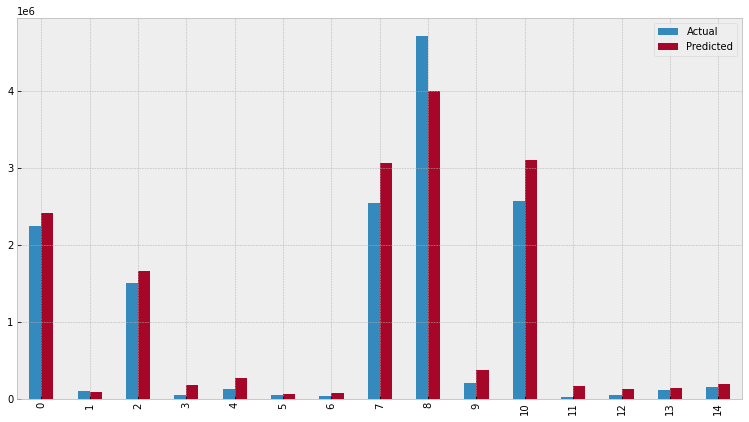

In [ ]:
pred.plot(kind='bar', figsize=(13, 7))

**MAE - MSE - RMSE**

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 219726.32287738667
MSE: 185960120337.23108
RMSE: 431230.9362015103


**CONCLUSION**

**EL MODELO PREDICTIVO INDICA UNA TENDENCIA, PERO NO PRESENTA EXACTITUD.**